# 실시간으로 환율과 제품 가격을 얻어오기

1. Beautifulsoup : 네이버 환율을 이용하여 해당 시각의 환율을 얻어옴
2. Beautifulsoup : 아마존 혹은 아마존 특정 제품의 가격 히스토리를 알려주는 사이트(camelcamelcamel.com)를 이용하여 해당 시각의 
   제품 가격을 얻어옴   
   * 403 에러로 인해 2번이 불가능하여 크롬 플러그인 keepa를 이용, 가격 히스토리를 시트데이터로 변환하여 진행하였음
   * 환율 또한 히스토리를 시트데이터를 가져오는 것으로 변경하였음

In [1]:
# 실시간 환율 얻어오기 : 1.
# 실시간 일자 얻어오기 : 2.
# 물품 가격정보 얻어오기 : 3.
# 일자와 환율을 얻어 파일로 저장('A' : append) : 4.
# 하루에 한 번, 일정한 시각에 환율/일자를 얻어와서 파일에 저장함

import pandas as pd
import requests  # requests 모듈
import datetime  # datetime 모듈
from bs4 import BeautifulSoup # BeautifulSoup 모듈


#url = "https://fxmarketapi.com/apilive"  # 베이스 URL
#querystring = {"currency":"USDKRW","api_key":"lA1CykZN5UOnxZMu8H_g"}  # 얻어올 환율 : USD에서 KRW로, 발급받은 api_key와 함께
#response = requests.get(url, params=querystring) # URL에 대한 응답 얻어옴(USDKRW만)

#print(response.json())


# 1.
######## 환율 얻어오는 부분 ########
# 네이버 환율정보 이용
url = 'http://finance.naver.com/'
res = requests.get(url)
text = res.text

soup = BeautifulSoup(text, 'html.parser')  # BeautifulSoup 모듈 이용하여 파싱
td = soup.select_one("#content > div.article2 > div.section1 > div.group1 > table > tbody > tr > td") # USD 환율 부분만 얻어옴
######## 환율 얻어오는 부분 ########


# 2.
######## 일자 얻어오는 부분 ########
now = datetime.datetime.now()  # datetime 모듈의 .now() 메소드 사용하여 현재 일자와 시각 정보를 얻어옴
nowdate = now.strftime('%Y-%m-%d')  # 년/월/일까지만 출력하게 함
######## 일자 얻어오는 부분 ########


# 3.
######## 물품 가격정보를 얻어옴 ########  # selenium도 사용????

### 아마존 사이트를 이용하는 방법
#ama_url1 = 'https://www.amazon.com/s?k='
#productCode = 'B079H7N61M'    # 가격정보를 얻어올 물품의 코드명, 아마존은 각 상품마다 고유 코드가 발급되기 때문에 이 부분만 입력하여
#ama_url2 = '&ref=nb_sb_noss'
#url = ama_url1 + productCode + ama_url2   # 양 옆의 코드와 입력한 물품의 코드를 합쳐 온전한 url 생성 후 가격정보를 얻어올 수 있음

#ama_res = requests.get(url)
#ama_text = ama_res.text

#soup = BeautifulSoup(ama_text, 'html.parser')  # BeautifulSoup 모듈 이용하여 파싱

 
### 낙타(camelcamelcamel.com) 사이트를 이용하는 방법
#camel_url1 = 'https://camelcamelcamel.com/search?sq'
#productCode = B079H7N61M'
#camel_url2 = ''&p=1'

#url = camel_url1 + productCode + camel_url2

#camel_res = requests.get(url)
#camel_text = camel_res.text

#soup = BeautifulSoup(camel_text, 'html.parser')  # BeautifulSoup 모듈 이용하여 파싱

#soup

### 403 forbidden ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
# 403오류로 방법 변경 : 외부 플러그인 이용하여 물품가격 데이터 얻어오기



######## 물품 가격정보를 얻어옴 ######## 


# 4.
######## 환율, 일자, 물품가격정보를 파일로 저장 ########
#print(td.text) # <td></td> 제외한 text부분만 가져옴
#print(nowdate)

my_dict = pd.Series({nowdate:td.text})
#total = pd.DataFrame(my_dict)

my_dict
my_dict.to_csv("./date_rate.csv", mode = "a")  # append 모드, 특정 시각마다 실행함으로써 기존 파일에 계속 덧대어져 저장
### 매크로 통해 특정 시각에만 코드를 실행하게 함으로써 데이터를 수집할 수 있음

######## 환율, 일자, 물품가격정보를 파일로 저장 ########




# 물품 가격은 불규칙적으로 변화, 변동될 때마다 기록

# 가격이 변동될 때마다 환율도 얻어오게 할 경우
# 네이버 환율을 이용하여 해당 일자(시각)의 환율을 얻어올 수 있음 
# 사용할 가능성이 있어 해당 코드는 삭제하지 않았음

C:\ProgramData\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:85: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


# 환율정보 히스토리 가져오기

1. fxmarketapi를 이용하여 특정 기간동안의 환율 데이터를 얻어오기
   * api_key를 발급받은 후 currency 부분에 가져올 환율, start/end_date에는 각각 가져올 날짜 범위(시작/종료일)를 지정
   * 휴무일에는 환율정보 변동없음, 가격 데이터의 시트 수와 맞추기 위해 없는 날짜는 이전 날짜의 값을 사용하는 것으로 변경하였음

In [2]:
####  USD - KRW 시계열 환율정보 긁어오기
####  원래는 실시간으로 일자와 환율정보, 가격정보를 긁어와서 저장한 것으로 분석해야하지만  ####
####  365일(1년) 데이터가 필요하여 기존에 있던 시계열 데이터를 가져와서 진행하였음  ####
#import pandas as pd


df = pd.read_json("https://fxmarketapi.com/apipandas?api_key=lA1CykZN5UOnxZMu8H_g&currency=USDKRW&start_date=2017-11-01&end_date=2019-11-01")


#df.index # 2018-11-01부터 2019-11-01까지 1년, 휴무일엔 오픈되지 않으므로 주말/휴무일 뺀 일자만
# 없는 일자의 경우 그 전날의 데이터를 그대로 가지고 오게 하였음 : 물품가격 데이터와 행 갯수 맞추기 위함
df.head(5)

,open,high,low,close
2018-09-06,1120.89795,1123.96033,1120.82019,1122.06018
2018-09-07,1121.94031,1128.78040,1121.00024,1128.52039
2018-09-10,1128.55042,1131.00024,1125.92493,1129.72009
2018-09-11,1130.51025,1137.89233,1124.02002,1124.02991
2018-09-12,1123.96960,1129.40320,1117.77991,1120.20496


In [110]:
df2 = df.copy() #원본 복사
df2['환율'] = df['open']

del df2['open']
del df2['high']
del df2['low']
del df2['close']

df2.head()

,환율
2018-11-01,1141.89
2018-11-02,1124.20
2018-11-05,1117.78
2018-11-06,1120.94
2018-11-07,1121.82


In [111]:
#df.columns  # open, high, low, close 네 개 출력, close만 필요하므로 나머지 숨기기


#### open 부분을 제외한 나머지 부분 숨기기 ####
#df['환율'] = df['open']

#del df['open']
#del df['high']
#del df['low']
#del df['close']
#### open 부분을 제외한 나머지 부분 숨기기 ####


# index에 대해 반복 : 달마다 말일이 다르므로 1~12 각각에 대해 수행(조건) {
## 각각 달마다 말일까지 반복하여 일 수를 +1한 index 값이 존재하지 않는다면
### 해당 index 생성하고 / index에 대한 값으로 바로 전날의 환율 값을 가져옴
## index값이 존재한다면 일 수를 +1하여 다시 반복 }

#df.to_csv("exrate_1.csv", mode='w')  # csv 파일로 저장


# 환율정보와 가격정보 결합, 환전 후 가격 얻어오기

1. 물품의 가격정보를 저장한 csv 파일을 불러와 환율정보가 있는 csv와 합침
2. 같은 날짜의 물품 가격(USD)과 환율을 곱하여 환전 후 가격을 새로운 컬럼으로 생성
   * 같은 날짜의 같은 시각(환율시장 개장(open) 컬럼과 물품 가격 컬럼을 곱하였음
   * 가져온 물품 가격 데이터는 해당일의 환율시장 개장 시각과 같음 : 09시

In [30]:
import pandas as pd

# 물품 가격정보는 정오시간 기준으로 일자마다 1개의 레코드씩 저장됨
# 한 일자에 하나의 물품 가격정보만 저장됨
# 얻어올 수 있었다면 주기적으로 체크해서 좀 더 예측 정확도를 키울 수 있지 않았을까?

#pro_price = pd.read_csv('./product.csv', encoding = 'utf-8') # 물품의 가격정보를 모은 파일 오픈 : product(기계식키보드)
#pro_price = pd.read_csv('./product1.csv', encoding = 'utf-8') # 물품의 가격정보를 모은 파일 오픈 : product1(창문형 에어컨)
pro_price = pd.read_csv('./product2.csv', encoding = 'utf-8') # 물품의 가격정보를 모은 파일 오픈 : product2(남성용 수영복)

pro_price.head(2)

,date,price
0,2018-11-01,29.5
1,2018-11-02,29.5


In [31]:
EXR = pd.read_csv('./exrate_1.csv', encoding = 'utf-8')  ## 휴무일/주말.. : 그 전날 가격 값을 input한 csv파일 open

EXR.head(2)

,Unnamed: 0,open,high,low,close
0,2018-11-01,1141.89465,1142.11536,1123.11621,1124.13611
1,2018-11-02,1124.19629,1130.17419,1112.21521,1118.11340


In [32]:
EXR['일자'] = EXR['Unnamed: 0']
EXR['환율'] = EXR['open']
EXR['가격(USD)'] = pro_price['price'] # product1.csv로부터 가격정보(USD) 속성과 값을 가져와서 exrate_1.csv에 추가

# 일자/환율/가격(USD) 이외 행 지움
del EXR['Unnamed: 0']
del EXR['open']
del EXR['high']
del EXR['low']
del EXR['close']

EXR.head()

,일자,환율,가격(USD)
0,2018-11-01,1141.89465,29.5
1,2018-11-02,1124.19629,29.5
2,2018-11-03,1124.19629,29.5
3,2018-11-04,1124.19629,29.0
4,2018-11-05,1117.77576,29.0


In [33]:
#pd.options.display.float_format = '{:.0f}'.format  # 소숫점 떼기, 굳이..? 할 필요 x

EXR['가격(KRW)'] = EXR['환율'] * EXR['가격(USD)']  # 그 시간의 환율(원화 가격) 반영한 가격 생성
#EXR.to_csv('./total.csv', mode = 'w') # w 모드 : 덮어쓰기
#EXR.to_csv('./total1.csv', mode = 'w') # w 모드 : 덮어쓰기
EXR.to_csv('./total2.csv', mode = 'w') # w 모드 : 덮어쓰기
EXR

,일자,환율,가격(USD),가격(KRW)
0,2018-11-01,1141.89465,29.50,33685.892175
1,2018-11-02,1124.19629,29.50,33163.790555
2,2018-11-03,1124.19629,29.50,33163.790555
3,2018-11-04,1124.19629,29.00,32601.692410
4,2018-11-05,1117.77576,29.00,32415.497040
5,2018-11-06,1120.94299,29.00,32507.346710
6,2018-11-07,1121.81665,29.00,32532.682850
7,2018-11-08,1116.53259,29.00,32379.445110
8,2018-11-09,1121.52625,28.00,31402.735000
9,2018-11-10,1121.52625,28.00,31402.735000


In [34]:
#total = pd.DataFrame({'ds':EXR['일자'], 'y':EXR['가격(KRW)']})
#total = pd.DataFrame({'ds':EXR['일자'], 'y':EXR['환율']})
total = pd.DataFrame({'ds':EXR['일자'], 'y':EXR['가격(USD)']})

total

,ds,y
0,2018-11-01,29.50
1,2018-11-02,29.50
2,2018-11-03,29.50
3,2018-11-04,29.00
4,2018-11-05,29.00
5,2018-11-06,29.00
6,2018-11-07,29.00
7,2018-11-08,29.00
8,2018-11-09,28.00
9,2018-11-10,28.00


# facebook Prophet 모듈을 사용하여 앞으로의 가격 예측

1. 제품 자체의 가격을 예측하여 표시
2. 환율을 예측하여 표시
3. 환율과제품 가격을 예측한 값을 곱하여그래프로 표현

In [35]:
import warnings
from fbprophet import Prophet  # conda install -c conda-forge fbprophet
# 예측값의 상한/하한가 제어해야 할 경우 값을 지정
#m['cap'] = 상한가로 지정할 값(한계값)
#m['floor'] = 하한가로 지정할 값(한계값)

m = Prophet(yearly_seasonality = 15, daily_seasonality = True, changepoint_prior_scale=0.1)
#yearly_seasonality를 조절 : seasonality가 자주 발생할 경우 언더피팅, 해결을 위해 기본값 10에서 15로 수정
#change point의 유연성을 조절 : 기본 0.05에서 0.1로 변경, 언더피팅 해결을 위함
#세 개의 데이터를 시험하였을때 가장 이상적인 수치(각각 다른 물품 데이터에 모두 공통적으로 적용하였음)

m.add_country_holidays(country_name='US')
# Bulit-in Country Holidays : fbprophet에서 자체적으로 지원하는 기능
# 해당 코드와 일치하는 국가의 국경일을 가져와 holiday 변수로 삼음
# 해외 제품, 해외의 휴무일이나 주말 등일 경우 물건 값이 변동될 수 있는 여지가 있어서 포함시킴


### 초깃값의 영향이 가장 큼, 그 이외의 값은 제외하지 않아도 결과가 크게 바뀌지 않아 비활성화
#total.loc[(total2['ds'] >= '2018-11-29') & (total2['ds'] <= '2018-11-30'), 'y'] = None 
#total.loc[(total2['ds'] == '2018-01-12'), 'y'] = None
#total.loc[(total2['ds'] == '2019-01-21'), 'y'] = None
           

m.fit(total);

In [36]:
future = m.make_future_dataframe(periods=90) # 먼 미래를 예측할수록 불확실성이 커짐

future.head()
#future.tail()

,ds
0,2018-11-01
1,2018-11-02
2,2018-11-03
3,2018-11-04
4,2018-11-05


In [37]:
#예측값의 상한/하한가를 제어할 값과 동일하게 값을 지정
#future['cap'] = 상한가로 지정할 값(한계값)
#future['floor'] = 하한가로 지정할 값(한계값)


forecast = m.predict(future)
#forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
#forecast[['ds', 'trend', 'trend_lower', 'trend_upper']].tail()

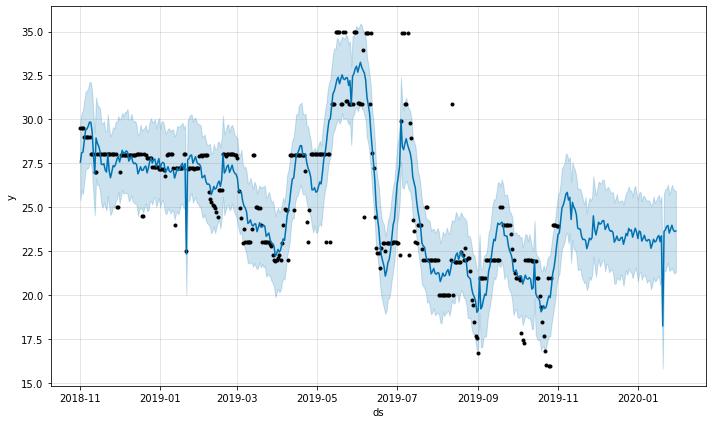

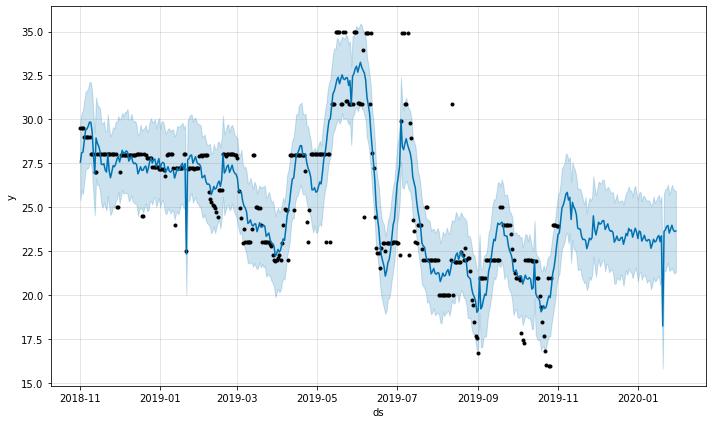

In [38]:
#import matplotlib as plt
#forecast.iloc[-100:, :].trend.plot()

m.plot(forecast, uncertainty = True)  # 불확실성 값을 true하여 예측범위 보이게 함

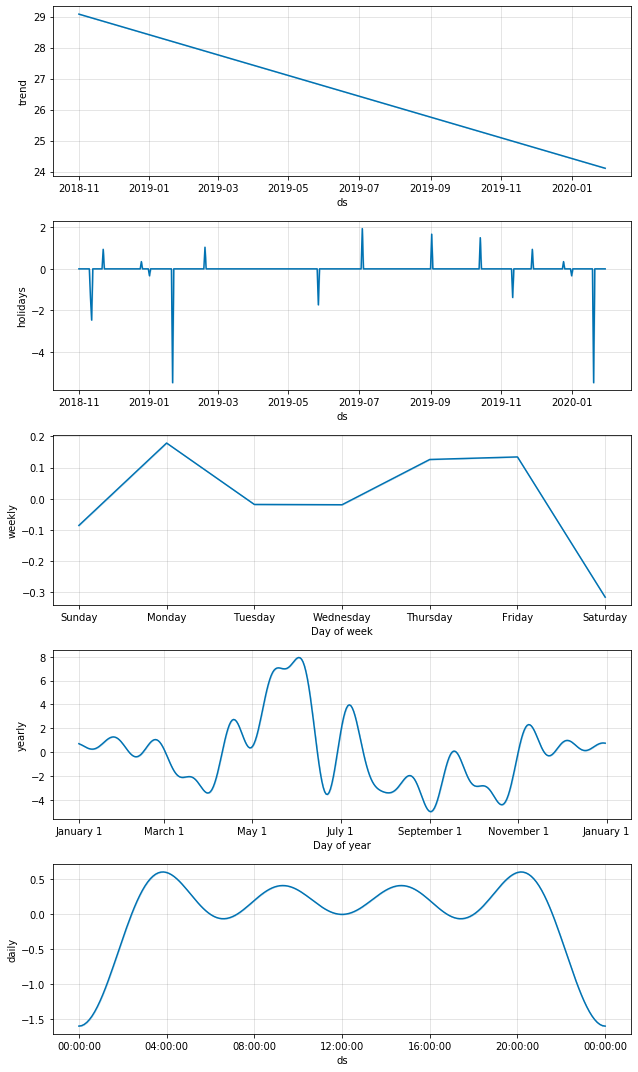

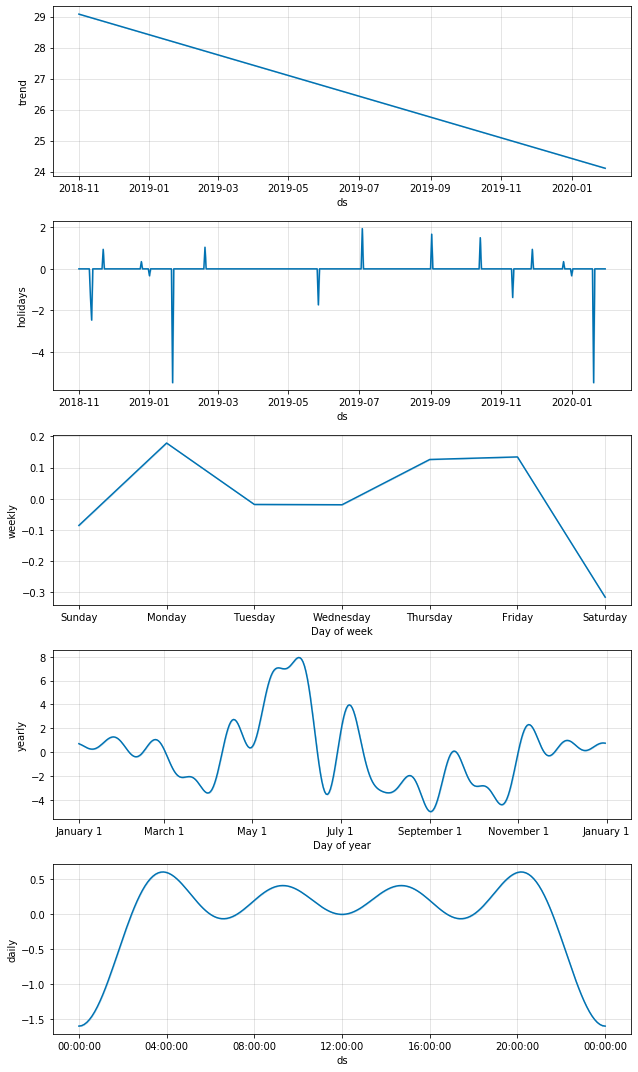

In [39]:
m.plot_components(forecast)
## 추세는 계속해서 올라감(해가 지날수록 가격이 올라가고 있음)
## holidays(국경일, 휴무일)은 크게 의미 없음 : 아마존은 자체적 행사(타임세일이나 블랙프라이데이 등)쪽에 비중을 더 많이 둬서?
## 주로 화요일 혹은 금요일에 가격이 오름, 일,월,목요일에 가격이 낮은 편
### 해당 물품(창문형 에어컨)의 가격은 주로 여름 직전에 최고조에 이르고, 한여름부터는 가격이 다소 내려가는 경향을 보임
#### 사람들이 여름맞이를 위해 에어컨 수요가 높은 4-5월에 가격이 높아짐(수요가 많아 가격도 오름)

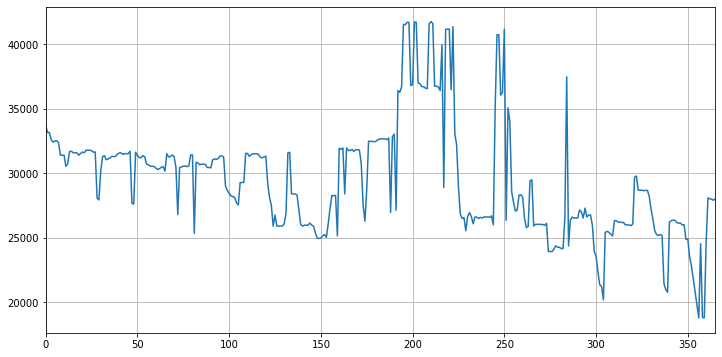

In [40]:
#EXR['가격(USD)'].plot(figsize=(12, 6), grid = True)
#EXR['환율'].plot(figsize=(12, 6), grid = True)
EXR['가격(KRW)'].plot(figsize=(12, 6), grid = True)

## 환율은 prophet으로 예측하기 다소 힘든 부분이 있음(트렌드나 시즈널리티가 다소 모호함)
### keras 모듈을 사용하는게 더 적합하나, 프로젝트의 본래 목적(수업때 배운 것을 가지고 최대한 활용)을 위해 prophet으로 진행하였음

In [41]:
#total = pd.DataFrame({'ds':EXR['일자'], 'y':EXR['가격(KRW)']})
#total = pd.DataFrame({'ds':EXR['일자'], 'y':EXR['가격(USD)']})
total2 = pd.DataFrame({'ds':EXR['일자'], 'y':EXR['환율']})

total2.head(2)

,ds,y
0,2018-11-01,1141.89465
1,2018-11-02,1124.19629


In [42]:
#import warnings
#from fbprophet import Prophet  # conda install -c conda-forge fbprophet

m2 = Prophet()

### 환율의 경우 고정적으로 영향을 끼치는 요인이 거의 없음, 돌발 변수가 오히려 더 많을 듯 : seasonality 비활성화 
#m2 = Prophet(yearly_seasonality = True, daily_seasonality = True, changepoint_prior_scale=0.1)
#yearly_seasonality를 조절 : seasonality가 자주 발생할 경우 언더피팅, 해결을 위해 기본값 10에서 15로 수정
#change point의 유연성을 조절 : 기본 0.05에서 0.1로 변경, 언더피팅 해결을 위함

m2.fit(total2);



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
forecast2 = m2.predict(future)
forecast2[['ds','yhat','yhat_lower','yhat_upper']].tail()
#forecast[['ds', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
451,2020-01-26,1131.520795,1059.060060,1202.686287
452,2020-01-27,1131.061767,1055.681497,1204.897711
453,2020-01-28,1131.200493,1054.693520,1205.510897
454,2020-01-29,1130.193711,1055.034887,1204.326879
455,2020-01-30,1129.860944,1049.879507,1205.727938


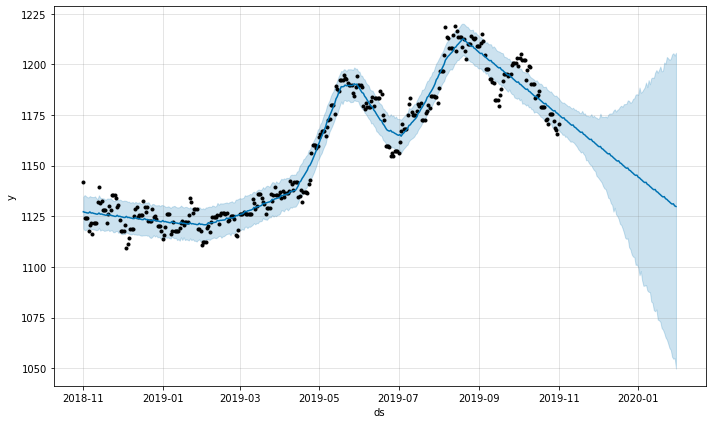

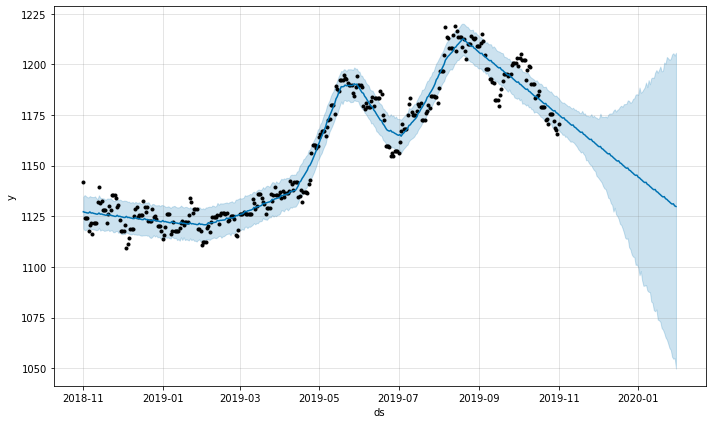

In [44]:
m2.plot(forecast2, uncertainty = True)  # 불확실성 값을 true하여 예측범위 보이게 함
# 앞쪽에 예측범위에서 튀는 값이 많아 불확실성이 매우 큼

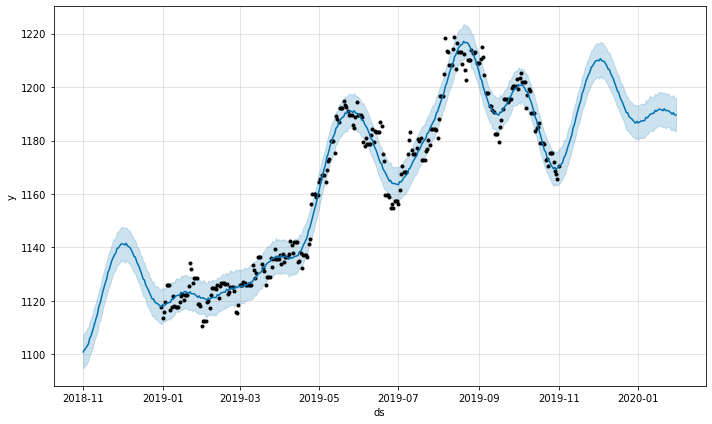

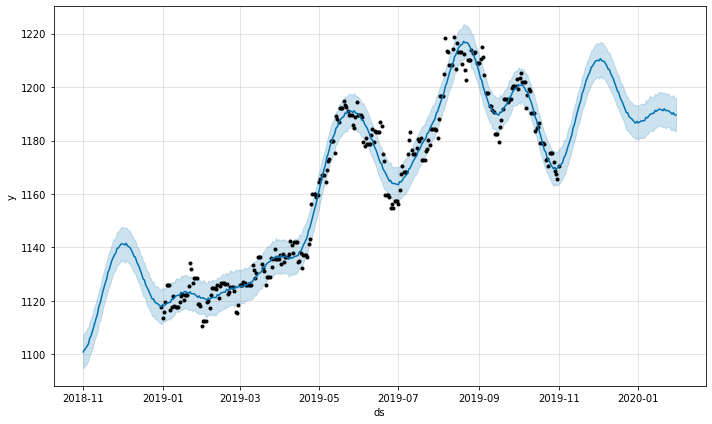

In [45]:
total2.loc[(total2['ds'] >= '2018-11-01') & (total2['ds'] < '2018-12-31'), 'y'] = None
# 2018.11.1 부터 2018.12.31까지의 값들 중 예측범위에서 크게 튀는 값이 많아서 제외하고 예측

m3 = Prophet(yearly_seasonality = True, daily_seasonality = True).fit(total2)
forecast3 = m3.predict(future)

m3.plot(forecast3)

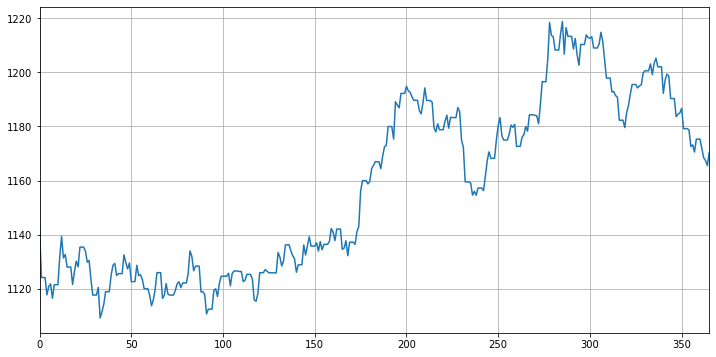

In [46]:
EXR['환율'].plot(figsize=(12, 6), grid = True)

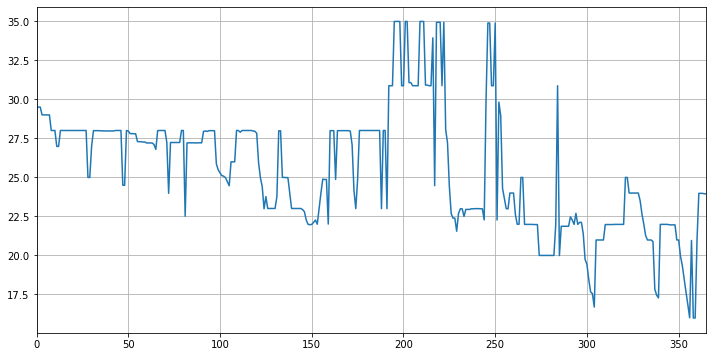

In [47]:
EXR['가격(USD)'].plot(figsize=(12, 6), grid = True)

In [48]:
#forecast.to_csv('./물품가격.csv', mode='w')
#forecast3.to_csv('./환율.csv', mode='w')

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-11-01,29.077718,25.401199,29.950476,29.077718,29.077718,0.0,0.0,0.0,0.0,...,0.126010,0.126010,0.126010,-0.038737,-0.038737,-0.038737,0.0,0.0,0.0,27.565623
1,2018-11-02,29.066790,25.956106,30.362176,29.066790,29.066790,0.0,0.0,0.0,0.0,...,0.134165,0.134165,0.134165,0.501952,0.501952,0.501952,0.0,0.0,0.0,28.103540
2,2018-11-03,29.055861,25.756290,30.509857,29.055861,29.055861,0.0,0.0,0.0,0.0,...,-0.315800,-0.315800,-0.315800,0.994280,0.994280,0.994280,0.0,0.0,0.0,28.134973
3,2018-11-04,29.044933,26.455983,31.079371,29.044933,29.044933,0.0,0.0,0.0,0.0,...,-0.085597,-0.085597,-0.085597,1.423063,1.423063,1.423063,0.0,0.0,0.0,28.783031
4,2018-11-05,29.034004,27.135351,31.558676,29.034004,29.034004,0.0,0.0,0.0,0.0,...,0.178733,0.178733,0.178733,1.776006,1.776006,1.776006,0.0,0.0,0.0,29.389375


In [49]:
total_forecast = forecast3.copy()

#total_forecast['일자'] = forecast3['ds']   # ds로 표시되는 것을 일자로 변환하기 위함, 없어도 상관없음

# 해당일의 원화 가격과 예측가격 곱해서 평균/상한/하한가 생성
total_forecast['평균가'] = forecast['yhat'] * forecast3['yhat']
total_forecast['상한가'] = forecast['yhat_upper'] * forecast3['yhat_upper']
total_forecast['하한가'] = forecast['yhat_lower'] * forecast3['yhat_lower']

# 리스트 만든 후 반복하여 불필요 속성 지움
erase_properties = ['yhat', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms',
                   'additive_terms_lower', 'additive_terms_upper', 'daily', 'daily_lower', 'daily_upper', 'weekly',
                   'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
                   'multiplicative_terms_lower', 'multiplicative_terms_upper']

for i in erase_properties :
    del total_forecast[i]

"""
## 나머지 속성 전부 지움 : for문으로 대체
#del total_forecast['ds']
del total_forecast['yhat']
del total_forecast['trend']
del total_forecast['yhat_lower']
del total_forecast['yhat_upper']
del total_forecast['trend_lower']
del total_forecast['trend_upper']
del total_forecast['additive_terms']
del total_forecast['additive_terms_lower']
del total_forecast['additive_terms_upper']
del total_forecast['daily']
del total_forecast['daily_lower']
del total_forecast['daily_upper']
del total_forecast['weekly']
del total_forecast['weekly_lower']
del total_forecast['weekly_upper']
del total_forecast['yearly']
del total_forecast['yearly_lower']
del total_forecast['yearly_upper']
del total_forecast['multiplicative_terms']
del total_forecast['multiplicative_terms_lower']
del total_forecast['multiplicative_terms_upper']
"""

# total_forecast.head()
total_forecast.tail()

,ds,평균가,상한가,하한가
451,2020-01-26,28268.845568,31080.658215,25390.339151
452,2020-01-27,28525.724017,31430.086241,25519.859479
453,2020-01-28,28226.036135,31179.968913,25258.288215
454,2020-01-29,28093.648148,31035.414699,25113.805158
455,2020-01-30,28123.286716,31032.047607,25207.908738


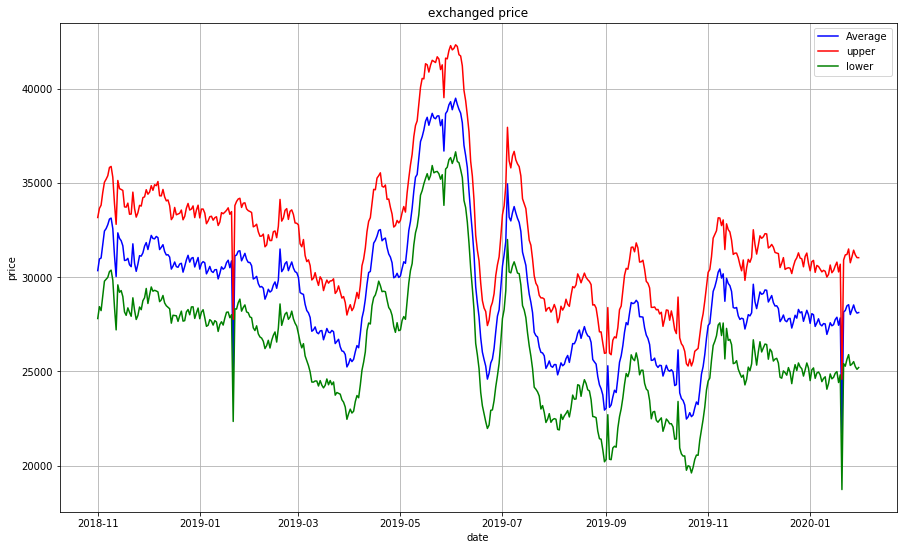

In [50]:
import matplotlib.pylab as plt
%matplotlib inline


plt.figure(figsize = (15, 9))
plt.grid(True)
plt.title("exchanged price")
plt.plot(total_forecast['ds'], total_forecast['평균가'], color='blue', label = "Average") # 평균가격 표시, 파란색
plt.plot(total_forecast['ds'], total_forecast['상한가'], color='red', label = "upper")  # 상한가 표시, 빨간색
plt.plot(total_forecast['ds'], total_forecast['하한가'], color='green', label = "lower") # 하한가 표시, 초록색

plt.xlabel("date")
plt.ylabel("price")
plt.legend(loc=0)
#plt.plot(figsize=(12, 6), grid = True)

plt.show()